## Ex2

### 2.1 
Is this symmetric or asymmetric encryption and explain why?

### 2.2
Write a small brute force program which tests keys from 0..255 and
use a dictionary approach to figure out the original message. 

What is the decryption algorithm/formula to be used? 

Since we have encoded_character[i] = character[i] + key + nonce(i) we can just revert this formula to obtain the formula which should be applied for each possible key

character[i] = encoded_character[i] - key - nonce(i) 

In [4]:
import numpy as np
text_encoded = "K]amua!kv$huvt"

text_ascii = np.array([ord(l) for l in text_encoded])
text_reverted = ''.join(chr(a) for a in text_ascii)

nonce = np.array([x for x in range(0,len(text_encoded))])

In [5]:
for key in range(0,256): #[0,256)
    #subtract key and nonce
    text_decoded=text_ascii-nonce-key
    #check for value out of range
    text_decoded[np.where(text_decoded<0)] = text_decoded[np.where(text_decoded<0)] + 256   
    text_reverted = ''.join(chr(a) for a in text_decoded)
    print ("Key: ", key, " Decription: ",text_reverted)

Key:  0  Decription:  K\_jq\dn^jjg
Key:  1  Decription:  J[^ip[cm]iif
Key:  2  Decription:  IZ]hoZbl\hhe
Key:  3  Decription:  HY\gnYak[ggd
Key:  4  Decription:  GX[fmX`jZffc
Key:  5  Decription:  FWZelW_iYeeb
Key:  6  Decription:  EVYdkV^hXdda
Key:  7  Decription:  DUXcjU]gWcc`
Key:  8  Decription:  CTWbiT\fVbb_
Key:  9  Decription:  BSVahS[eUaa^
Key:  10  Decription:  ARU`gRZdT``]
Key:  11  Decription:  @QT_fQYcS__\
Key:  12  Decription:  ?PS^ePXbR^^[
Key:  13  Decription:  >OR]dOWaQ]]Z
P\\Y  14  Decription:  =NQ\cN
Key:  15  Decription:  <MP[bMU_O[[X
Key:  16  Decription:  ;LOZaLT^NZZW
Key:  17  Decription:  :KNY`K
S]
MYYV
Key:  18  Decription:  9JMX_J	R\	LXXU
Key:  19  Decription:  8ILW^QKWWT
Key:  20  Decription:  7HKV]HPZJVVS
Key:  21  Decription:  6GJU\GOYIUUR
Key:  22  Decription:  5FIT[FNXHTTQ
Key:  23  Decription:  4EHSZEMWGSSP
Key:  24  Decription:  3DGRYDLVFRRO
Key:  25  Decription:  2CFQXCKUEQQN
Key:  26  Decription:  1BEPWBJTD

The used key is **251** and the original message text is **Padova is cool**

## Ex 3

In [23]:
import random
import matplotlib.pyplot as plt

[ 780  790  980  840  740  800  920  870  790 1000]


<BarContainer object of 10 artists>

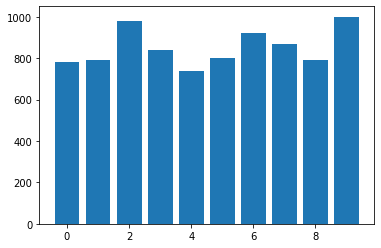

In [31]:
disks= np.array([0]*10)
while(np.max(disks)<1000):
    disk= random.randint(0, 9)
    disks[disk]+=10
print(disks)

plt.bar(np.linspace(0,9, 10),disks)

In [67]:
def FreeSpace(filesize = 10, graph=True, verbose=True, retu=False):
    disks= np.array([0.]*10)
    while(np.max(disks)<1000):
        disk= random.randint(0, 9)
        disks[disk]+=filesize
    placed = np.sum(disks)/filesize
    free = (10000-np.sum(disks))/100 #10000*100
    if graph:
        plt.bar(np.linspace(0,9, 10),disks)
    if verbose:
        print("Disks occupation:", disks)
        print("Placed files:    ", placed)
        print("Free space left: ", free, "%")  
    if(retu):
        return placed, free



Disks occupation: [ 740. 1000.  820.  850.  810.  760.  910.  920.  750.  590.]
Placed files:     815.0
Free space left:  18.5 %


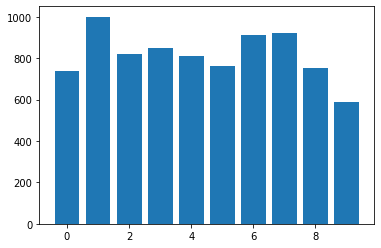

In [68]:
FreeSpace(10)


Disks occupation: [ 967.  975.  942.  950.  985. 1000.  930.  965.  945.  928.]
Placed files:     9587.0
Free space left:  4.13 %


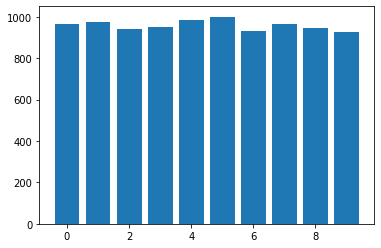

In [69]:
FreeSpace(1)

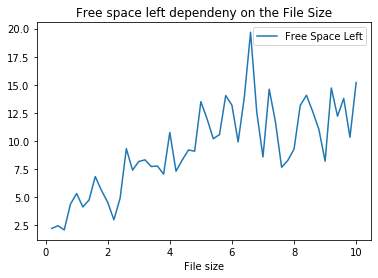

In [84]:
sizes= np.linspace(0.2, 10, 50)
y=[]

for size in sizes:
    p,f= FreeSpace(size, False, False, True)
    y.append(f)
    
plt.plot(sizes, y, label='Free Space Left')
plt.xlabel("File size")
plt.title("Free space left dependeny on the File Size")
plt.legend()
    


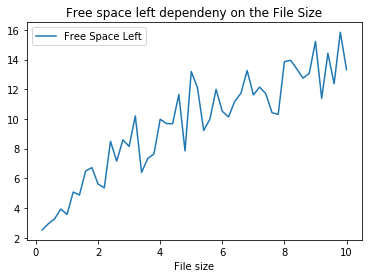

In [92]:
load= 5
sizes= np.linspace(0.2, 10, 10*load)
y=[]

for size in sizes:
    vals=[]
    for i in range(0,load):
        p,f= FreeSpace(size, False, False, True)
        vals.append(f)
    y.append(np.mean(np.array(vals)))
 

plt.plot(sizes, y, label='Free Space Left')
plt.xlabel("File size")
plt.title("Free space left dependeny on the File Size")
plt.legend()
    